In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150

In [2]:
import glob
import fitsio
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as pl
from sklearn.decomposition import FastICA, RandomizedPCA, NMF, ProjectedGradientNMF

In [3]:
bkg = fitsio.read("data/tess/05h28m00s+01d00m00s_dfm_expected/1800s/sub200x200/backgrounds.fits")

In [4]:
flat = 1 + 0.01 * np.random.randn(*(bkg.shape))

In [5]:
vrng = None
# pl.figure(figsize=(8, 8))
block = []
# fns = glob.glob("space.mit.edu/outgoing/zkbt/05h28m00s+01d00m00s_dfm_expected/1800s/sub200x200/simulated_*.fits")
fns = glob.glob("data/tess/05h28m00s+01d00m00s_dfm_extreme/1800s/sub200x200/simulated_*.fits")
for i, fn in tqdm(enumerate(fns), total=len(fns)):
    data = fitsio.read(fn)
    counts = data * flat
    block.append(counts)
#     counts = counts[50:150, 50:150]
#     if vrng is None:
#         vrng = np.log((counts.min(), counts.max()))
#     pl.clf()
#     pl.imshow(np.log(counts), cmap="gray_r", interpolation="nearest", vmin=vrng[0], vmax=vrng[1])
#     pl.axis("off");
#     pl.savefig("images/{0:04d}.png".format(i))

block = np.array(block)

In [6]:
block.shape

(1320, 200, 200)

In [55]:
block0 = block[:, 110:125, 110:150]
SHAPE = block0.shape[1:]
block0 = block0.reshape((len(block0), -1))
# block0[40:55, 10] *= 1.0 - 0.1**2
# block0 -= np.mean(block0, axis=0)
# block0 /= np.std(block0, axis=0)

In [56]:
model = FastICA(n_components=10)
model.fit(block0.T)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=10, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [57]:
n = len(model.components_)
print(n)

10


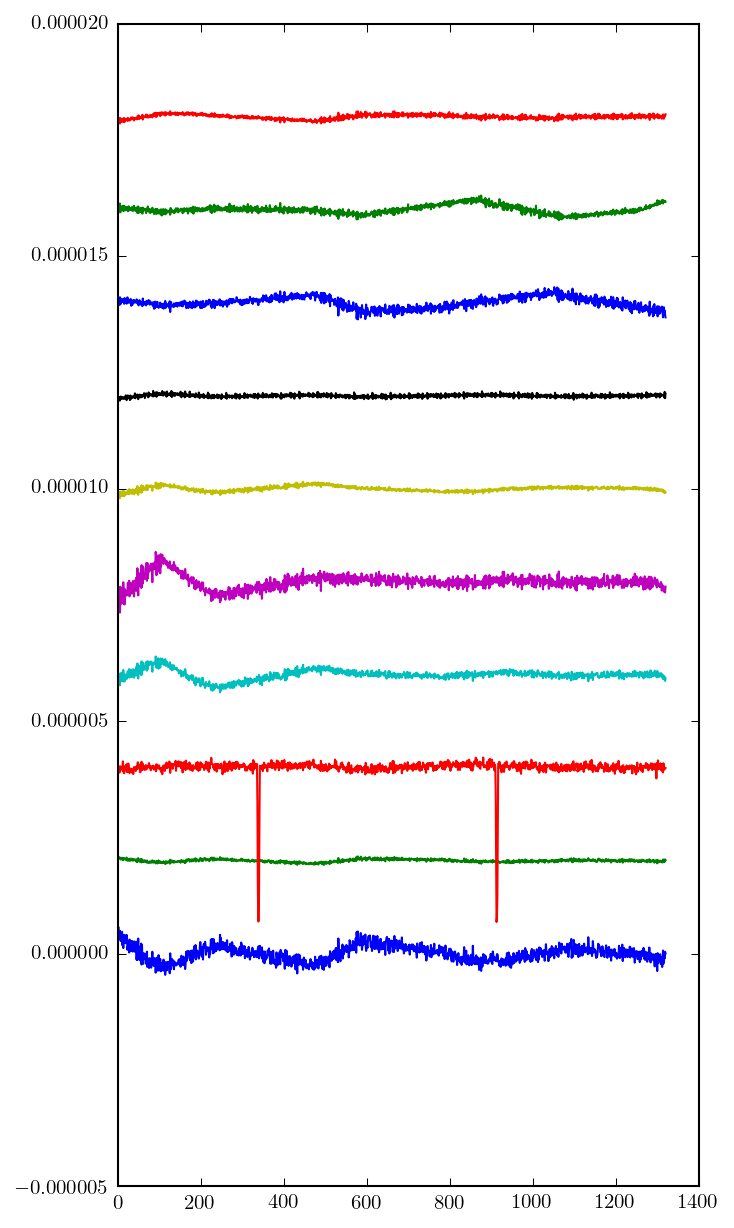

In [58]:
pl.figure(figsize=(5, 10))
pl.plot(model.components_.T + 2e-6*np.arange(n));

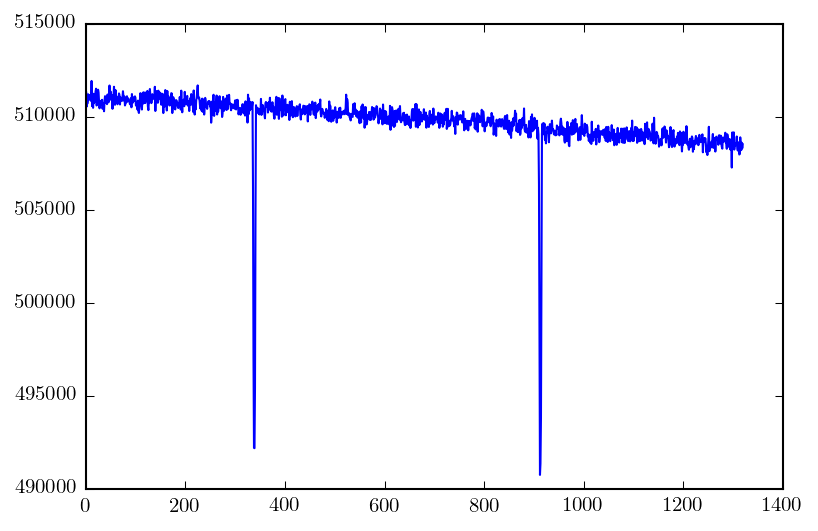

In [64]:
v = model.components_[2]
c = np.dot(v, block0)
c /= np.sum(c)
pl.plot(np.sum(c * block0, axis=1))

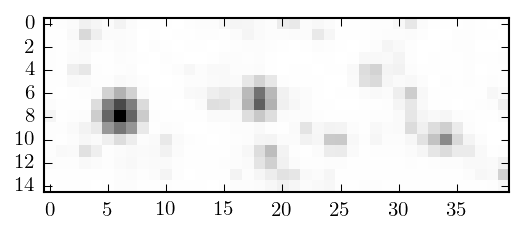

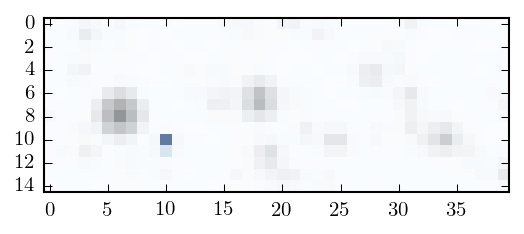

In [65]:
pl.figure(figsize=(4, 4))
pl.imshow(np.log(block0[0].reshape(SHAPE)), cmap="gray_r", interpolation="nearest")
pl.figure(figsize=(4, 4))
pl.imshow(np.log(block0[0].reshape(SHAPE)), cmap="gray_r", interpolation="nearest")
pl.imshow((np.dot(v, block0)**2).reshape(SHAPE), cmap="Blues", interpolation="nearest", alpha=0.6)